In [9]:
#!/usr/bin/env python
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np, os, sys
from tqdm.notebook import tqdm    
from manipulations import get_classes, get_classes_from_header, get_Fs_from_header, load_challenge_data
from sklearn.model_selection import KFold
if __name__ == '__main__':
    
    Datas = []
    Header_datas = []
    Classes = []
    dataset_idx = {}
    dataset_train_idx = {}
    dataset_test_idx = {}
    global_idx = 0
    for dataset in range(1,7):
        print('Dataset ', dataset)
        # Parse arguments.
        if len(sys.argv) != 3:
            raise Exception('Include the input and output directories as arguments, e.g., python driver.py input output.')

        input_directory = '../Data/Training{}/'.format(dataset)
        output_directory = '../Output/'

        # Find files.
        input_files = []
        for f in os.listdir(input_directory):
            if os.path.isfile(os.path.join(input_directory, f)) and not f.lower().startswith('.') and f.lower().endswith('mat'):
                input_files.append(f)

        if not os.path.isdir(output_directory):
            os.mkdir(output_directory)

        classes=get_classes(input_directory,input_files)

        num_files = len(input_files)
        datas = []
        header_datas = []
        dataset_idx[dataset] = []
        for i, f in tqdm(enumerate(input_files)):
            #print('    {}/{}...'.format(i+1, num_files), f)
            tmp_input_file = os.path.join(input_directory,f)
            data,header_data = load_challenge_data(tmp_input_file)
            datas.append(data[:,:])
            header_datas.append(header_data)
            dataset_idx[dataset].append(global_idx)
            global_idx += 1

        Datas += datas
        Header_datas += header_datas
        Classes += classes
        
        
        kf = KFold(5)
        train_idx, test_idx = next(kf.split(dataset_idx[dataset]))
        dataset_train_idx[dataset] = train_idx
        dataset_test_idx[dataset] = test_idx
        print('Done.')

Dataset  1



Done.
Dataset  2



Done.
Dataset  3



Done.
Dataset  4



Done.
Dataset  5



Done.
Dataset  6



Done.


In [18]:
dataset_train_idx[5]

array([ 4368,  4369,  4370, ..., 21834, 21835, 21836])

In [11]:
from global_vars import labels, Dx_map, Dx_map_unscored

In [12]:
Dx_map

,Dx,SNOMED CT Code,Abbreviation,CPSC,CPSC-Extra,StPetersburg,PTB,PTB-XL,Georgia,Total,Notes
0,1st degree av block,270492004,IAVB,722,106,0,0,797,769,2394,NaN
1,atrial fibrillation,164889003,AF,1221,153,2,15,1514,570,3475,NaN
2,atrial flutter,164890007,AFL,0,54,0,1,73,186,314,NaN
3,bradycardia,426627000,Brady,0,271,11,0,0,6,288,NaN
4,complete right bundle branch block,713427006,CRBBB,0,113,0,0,542,28,683,We score 713427006 and 59118001 as the same di...
5,incomplete right bundle branch block,713426002,IRBBB,0,86,0,0,1118,407,1611,NaN
6,left anterior fascicular block,445118002,LAnFB,0,0,0,0,1626,180,1806,NaN
7,left axis deviation,39732003,LAD,0,0,0,0,5146,940,6086,NaN
8,left bundle branch block,164909002,LBBB,236,38,0,0,536,231,1041,NaN
9,low qrs voltages,251146004,LQRSV,0,0,0,0,182,374,556,NaN


In [13]:
from manipulations import get_abbr, get_name
first_idx = {scored_code: None for scored_code in list(Dx_map['SNOMED CT Code'])}
first_idx_unscored = {unscored_code: None for unscored_code in list(Dx_map_unscored['SNOMED CT Code'])}

for i, Header_data in tqdm(enumerate(Header_datas)):
    codes = get_classes_from_header(Header_data)
    abbrs = ' '.join([get_abbr(int(code), Dx_map, Dx_map_unscored) for code in codes])
    for code, abbr in zip(codes, abbrs):
        if code in first_idx and first_idx[code] is None:
            first_idx[code] = i
        if code in first_idx_unscored and first_idx_unscored[code] is None:
            first_idx_unscored[code] = i
    encore = False
    for code in first_idx.keys():
        if first_idx[code] is None:
            encore = True
            break
    for code in first_idx_unscored.keys():
        if first_idx_unscored[code] is None:
            encore = True
            break
    if not encore:
        break

In [14]:
from signal_processing import myfilter, extract_QRST, main_QRST
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
qrs_chn = 12 # use the PCA of the frontal plane
for postfix in ['','_2']:
    for scored_code in tqdm(first_idx.keys()): # 

        idx = first_idx[scored_code]
        codes = get_classes_from_header(Header_datas[idx])
        names = ', '.join([get_name(int(code), Dx_map, Dx_map_unscored) for code in codes])

        if postfix == '':
            filtered_Data = myfilter(Datas[idx][:,1000:4000], 500, vis=False)
        else:
            filtered_Data = myfilter(Datas[idx][:,-4000:-1000], 500, vis=False)

        # get the lead to apply Pan Tomkins
        main_QRST(filtered_Data, idx, scored_code, postfix, names, fig2=True)

  


In [28]:
for postfix in ['']:
    for idx in tqdm(dataset_train_idx[5][::100]): # 
        if np.sum(Datas[idx]) != 0:
            codes = get_classes_from_header(Header_datas[idx])
            names = ', '.join([get_name(int(code), Dx_map, Dx_map_unscored) for code in codes])

            filtered_Data = myfilter(Datas[idx][:,1000:7000], 500, vis=False)

            # get the lead to apply Pan Tomkins
            main_QRST(filtered_Data, idx, '', postfix, names, fig2=True)

In [122]:
idx

37581

# Examine sampled ecg

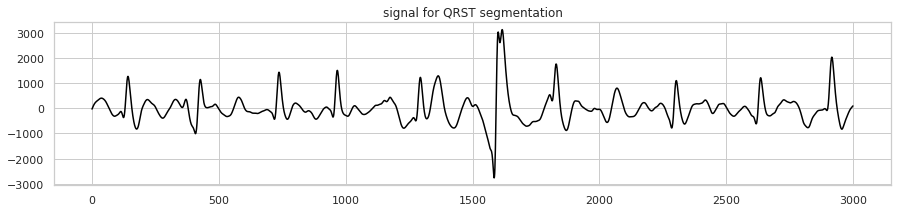

membership [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
big_members [1612]
removed!!!!!!
membership [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0]
big_members [ 144  421  737  965 1304 1833 2302 2634 2924]


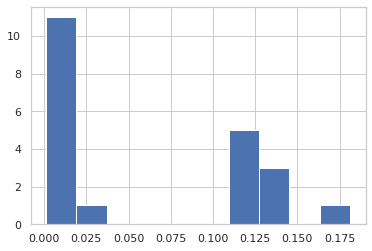

membership [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0]
gmm.means_ [[0.1306206 ]
 [0.00715254]]
threshold:0.11196193387805041
threshold:0.11196193387805041
left: [ 137  397  724  950 1285 1564 1818 2290 2630 2897] right: [ 154  439  751  982 1307 1644 1846 2315 2638 2934]
Q locations: [ 137  408  724  950 1285 1585 1818 2290 2626 2897]
R locations: [ 142  427  737  967 1294 1617 1829 2303 2635 2916]
S locations: [ 154  439  751  982 1307 1657 1846 2315 2638 2934]
------------------
------report------
RR std 70.92997764270802
R_loc [ 142  427  737  967 1294 1617 1829 2303 2635 2916]
------------------
------------------


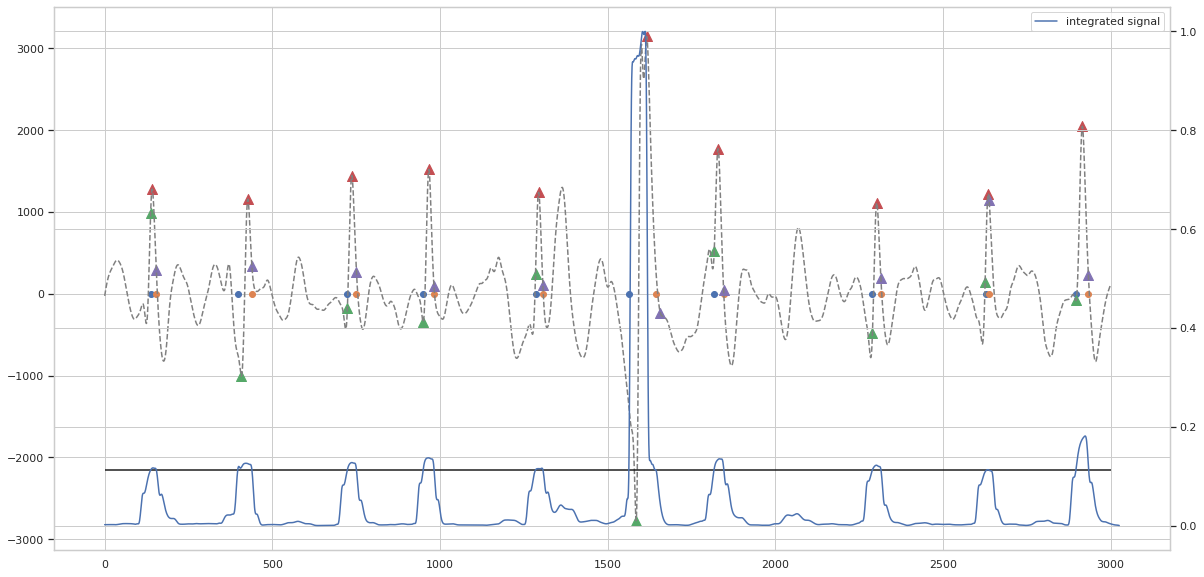

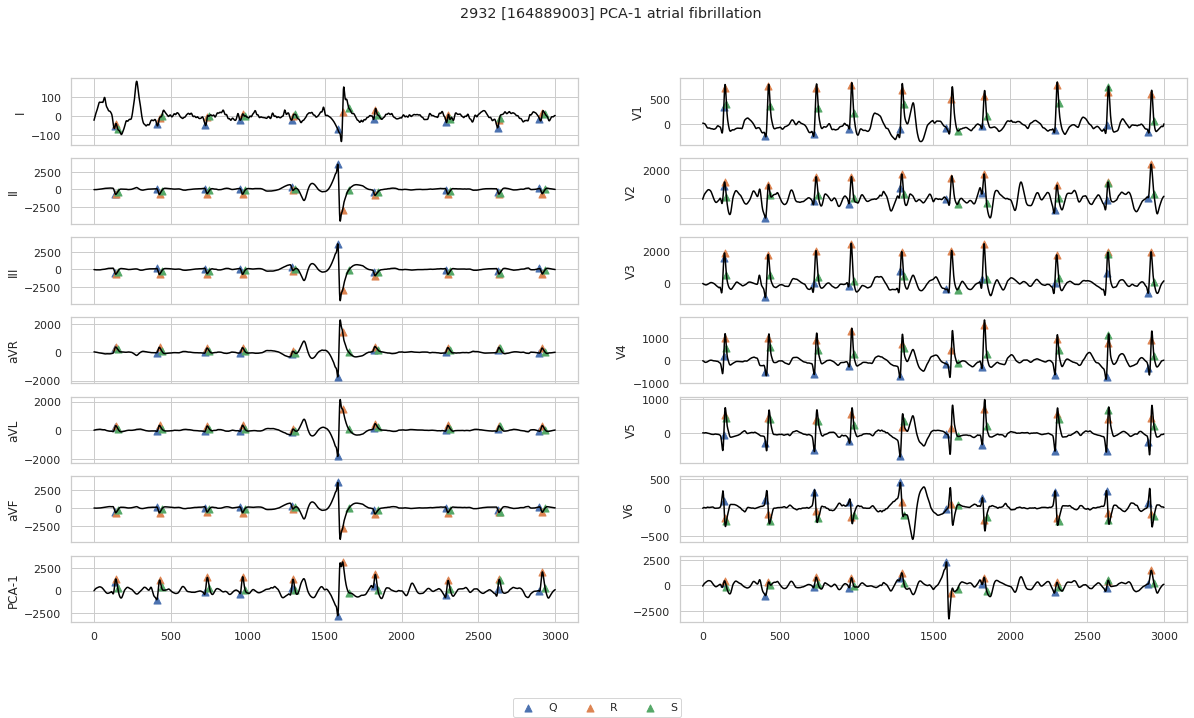

RR_avg 310.0 RR_th (93.0, 930.0)


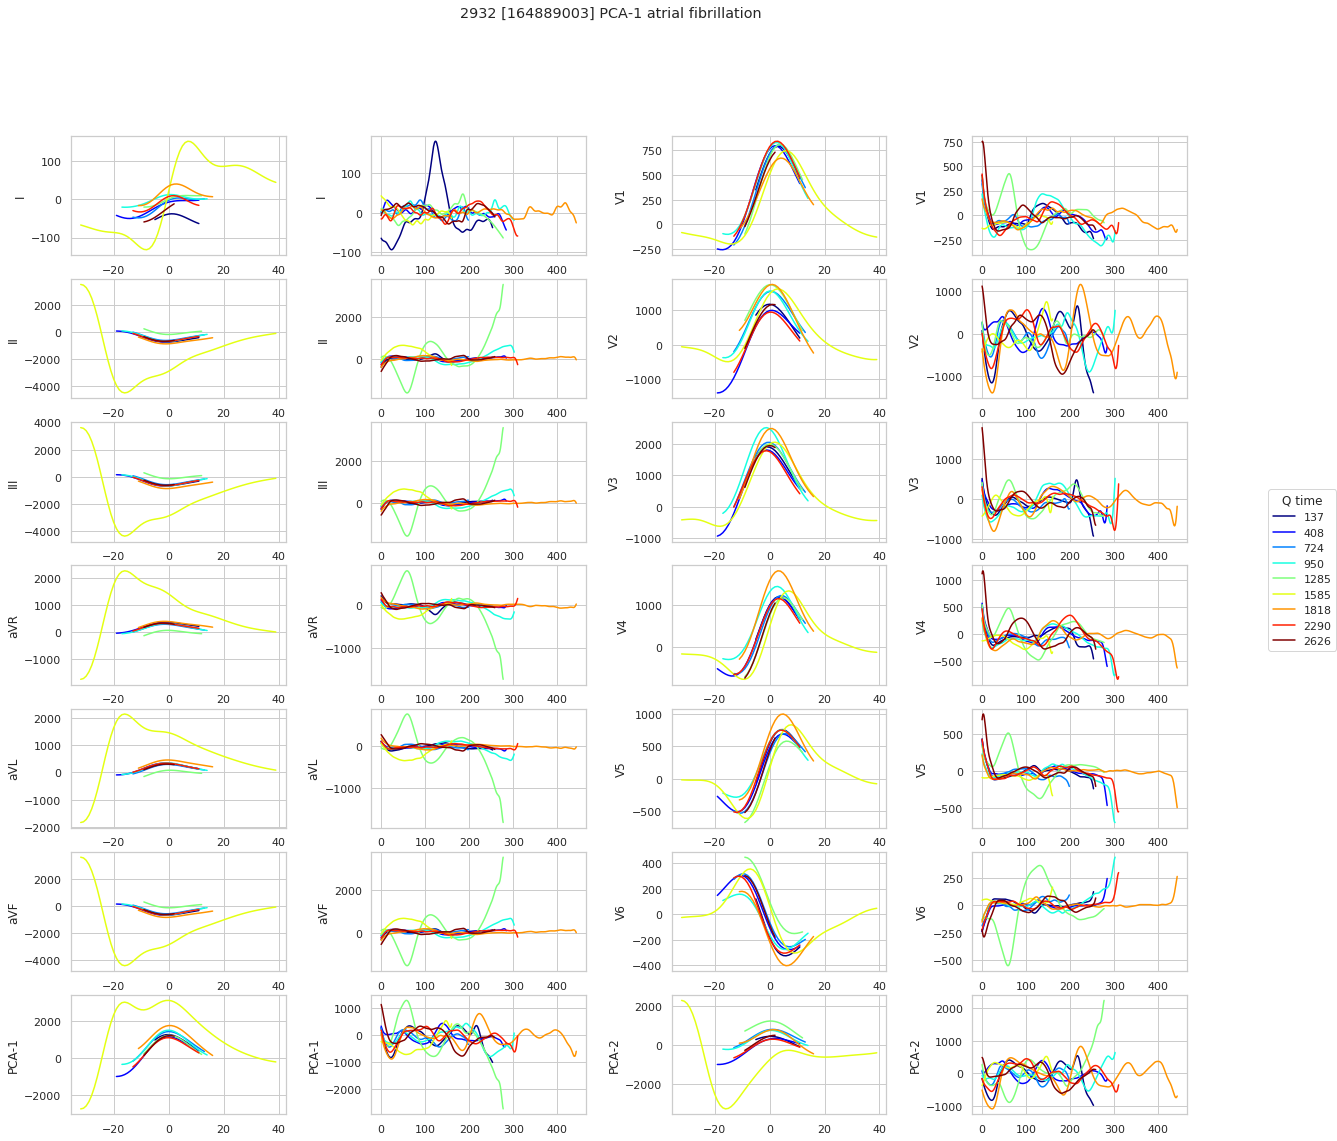

array([ 137,  408,  724,  950, 1285, 1585, 1818, 2290, 2626, 2897])

In [43]:
from signal_processing import myfilter, extract_QRST, main_QRST
idx = 2932 #37581#2932#6884 #6884 #6951 #227#8074 #325#158#325#34#17#8659#4#18#61#10927#6886# 8659
codes = get_classes_from_header(Header_datas[idx])
names = ', '.join([get_name(int(code), Dx_map, Dx_map_unscored) for code in codes])
filtered_Data = myfilter(Datas[idx][:,1000:4000], 500, vis=False)
#filtered_Data = myfilter(Datas[idx][:,-4000:-1000], 500, vis=False)
main_QRST(filtered_Data, idx, codes, '', names, vis=True, verbose=True, fig1=True, fig2=True)

In [16]:
[print(line) for line in Header_datas[idx]]

E08489.mat 12 500 5000 05-May-2020 09:49:17

E08489.mat 16+24 4880/mV 16 0 9 -19962 0 I

E08489.mat 16+24 4880/mV 16 0 9 32718 0 II

E08489.mat 16+24 4880/mV 16 0 0 -12377 0 III

E08489.mat 16+24 4880/mV 16 0 -9 26209 0 aVR

E08489.mat 16+24 4880/mV 16 0 4 -3881 0 aVL

E08489.mat 16+24 4880/mV 16 0 4 -22573 0 aVF

E08489.mat 16+24 4880/mV 16 0 39 -17460 0 V1

E08489.mat 16+24 4880/mV 16 0 48 -11751 0 V2

E08489.mat 16+24 4880/mV 16 0 19 -17008 0 V3

E08489.mat 16+24 4880/mV 16 0 9 -26898 0 V4

E08489.mat 16+24 4880/mV 16 0 9 -22988 0 V5

E08489.mat 16+24 4880/mV 16 0 -48 -26672 0 V6

#Age: 71

#Sex: Female

#Dx: 426783006

#Rx: Unknown

#Hx: Unknown

#Sx: Unknown



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# LAD, RAD 

In [56]:
from signal_processing import find_AD
diagnoses = []
true_diagnoses = []
for i, Header_data in tqdm(enumerate(Header_datas)):
    
    ads = find_AD(Datas[i][:,:])
    codes = get_classes_from_header(Header_data)
    ####
    diagnosis = 0
    if ads == "LAD" :
        diagnosis = 1
    elif ads == "RAD" :
        diagnosis = 2
    diagnoses.append(diagnosis)
    ####
    true_diagnosis = 0
    if 39732003 in codes:
        true_diagnosis = 1
    elif 47665007 in codes:
        true_diagnosis = 2
    true_diagnoses.append(true_diagnosis)

In [9]:
TP_lad = len(np.argwhere((np.array(true_diagnoses)==1) * (np.array(diagnoses)==1)).flatten())
FP_lad = len(np.argwhere((np.array(true_diagnoses)!=1) * (np.array(diagnoses)==1)).flatten())
FN_lad = len(np.argwhere((np.array(true_diagnoses)==1) * (np.array(diagnoses)!=1)).flatten())
TN_lad = len(np.argwhere((np.array(true_diagnoses)!=1) * (np.array(diagnoses)!=1)).flatten())

In [10]:
TP_rad = len(np.argwhere((np.array(true_diagnoses)==2) * (np.array(diagnoses)==2)).flatten())
FP_rad = len(np.argwhere((np.array(true_diagnoses)!=2) * (np.array(diagnoses)==2)).flatten())
FN_rad = len(np.argwhere((np.array(true_diagnoses)==2) * (np.array(diagnoses)!=2)).flatten())
TN_rad = len(np.argwhere((np.array(true_diagnoses)!=2) * (np.array(diagnoses)!=2)).flatten())

In [11]:
np.argwhere((np.array(true_diagnoses)==2) * (np.array(diagnoses)!=2)).flatten()

array([ 8662, 10991, 11141, 11313, 11894, 12076, 13804, 13808, 14501,
       14560, 14866, 15505, 15992, 16138, 16393, 16413, 16454, 17131,
       17252, 17588, 17754, 17782, 17992, 18017, 18222, 18435, 18556,
       18766, 19603, 19617, 19641, 19796, 20135, 21219, 21571, 21690,
       21937, 21942, 22134, 22174, 22222, 22262, 22316, 22504, 22560,
       22578, 23158, 24504, 25063, 25994, 26516, 26863, 27243, 27264,
       27652, 27814, 28084, 28505, 28545, 29702, 29746, 29802, 29882,
       30198, 30220, 30490, 30515, 31076, 31077, 31078, 31242, 31488,
       31866, 31895, 31952, 32383, 32491, 32548, 32995, 33792, 34124,
       34139, 35493, 35924, 36260, 36328, 37058, 37342, 37623, 37803,
       38226, 38723, 39838, 39999, 40058, 40238, 40360, 41103, 41132,
       42992])

In [13]:
print("LAD", TP_lad, FP_lad, FN_lad, TN_lad)
print("RAD", TP_rad, FP_rad, FN_rad, TN_rad)

LAD 5625 9357 461 27658
RAD 327 1999 100 40675


In [14]:
print("acc", (TP_lad + TN_lad) / (TP_lad + FP_lad + FN_lad + TN_lad))
print("recall", (TP_lad ) / (TP_lad + FN_lad))
print("precision", (TP_lad ) / (TP_lad + FP_lad ))

acc 0.7722094614974131
recall 0.9242523825172527
precision 0.37545054064877853


In [15]:
print("acc", (TP_rad + TN_rad) / (TP_rad + FP_rad + FN_rad + TN_rad))
print("recall", (TP_rad ) / (TP_rad + FN_rad))
print("precision", (TP_rad ) / (TP_rad + FP_rad ))

acc 0.9513004338646435
recall 0.765807962529274
precision 0.14058469475494412


# CWT

In [188]:
for i in range(12):
    cwt(myfilter(Datas[7488][i,1000:4000],500), vis=True)
    

NameError: name 'cwt' is not defined

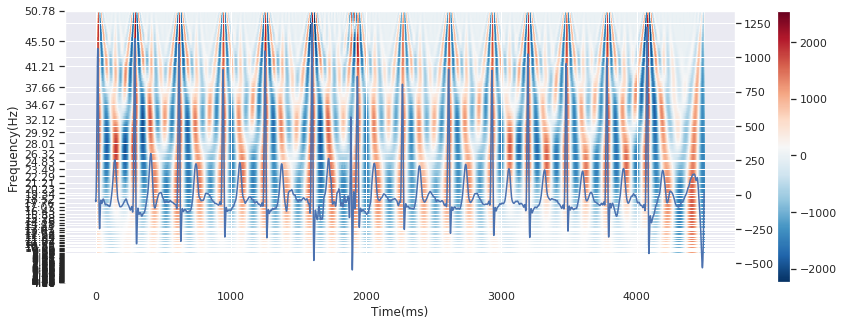

AFL


In [26]:
from signal_processing import cwt
idx = 7000
_=cwt(myfilter(Datas[idx][10,0:4500], 500), vis=True)
codes = get_classes_from_header(Header_datas[idx])
abbrs = ' '.join([get_abbr(int(code), Dx_map, Dx_map_unscored) for code in codes])
print(abbrs)

# DC gain